In [ ]:
##ARIMA AND ARIMAX MODELLING FOR DRYER VARIABLE##

In [5]:
#importing lib and loading file

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from pandas import Series
from statsmodels.tsa.stattools import adfuller

In [6]:
dataset = read_csv('F:/2018/cdac_project/19-072018/final_dataset.csv',index_col='Date_Time',parse_dates=True)

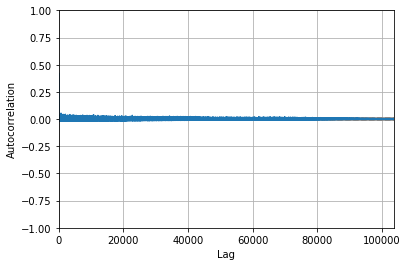

In [9]:
# implementing autocorrelation_plot to select the value of p in ARIMA(p=lag  in autoregression)
Dryer_df=dataset['2014-01-01':'2017-01-01'].Dryer
autocorrelation_plot(Dryer_df)

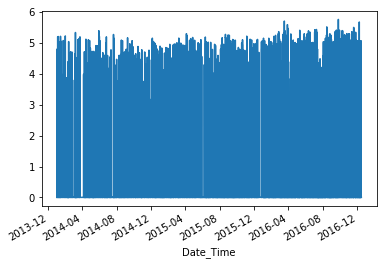

In [10]:
#check for trend visualy
dataset.Dryer.plot()


In [11]:
#Augmented Dickey-Fuller test 
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

#from statsmodels.tsa.stattools import adfuller
X = Dryer_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.

ADF Statistic: -45.164237
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [1]:
# view summary of model

model = ARIMA(Dryer_df,order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

NameError: name 'ARIMA' is not defined

In [13]:
#implementing ARIMA model and getting predictions

X = Dryer_df.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


for t in range(len(test)):
    model = ARIMA(history, order=(1,0,0))
#When fitting the model, a lot of debug information is provided about the fit of the linear regression model. 
#We can turn this off by setting the disp argument to 0.
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predi = output[0]
    predictions.append(predi)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (predi, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=0.039511, expected=0.002183
predicted=0.039475, expected=0.002700
predicted=0.039692, expected=0.002450
predicted=0.039586, expected=0.002667
predicted=0.039677, expected=0.002450
predicted=0.039586, expected=0.002450
predicted=0.039585, expected=0.002433
predicted=0.039578, expected=0.004733
predicted=0.040542, expected=0.003600
predicted=0.040066, expected=0.002883
predicted=0.039766, expected=0.002700
predicted=0.039688, expected=0.003133
predicted=0.039870, expected=0.002617
predicted=0.039653, expected=0.002550
predicted=0.039624, expected=0.002517


KeyboardInterrupt: 